### Support Vector Machines Example 2.5
The **sklearn.model\_selection** package includes a function **GridSearchCV**, which allows for comparison of different models. A set of *Tune Parameters* are considered for a certain type of model, in our case the familiar linear Support Vector Classifier model. In the following example, we will compare SVMs using a range of values of the cost parameter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from SVM_def import SVM_def

# SVM_def is a class containing definitions used throughout this Chapter
svm_def = SVM_def()

# Create data
n = 10
np.random.seed(6) 
# x from normal distribution # y is n elements -1 and n elements 1
x = np.random.normal(loc = 2, scale = 1.0, size = (2*n, 2)) 
y = np.concatenate((-1 * np.ones(n), np.ones(n))) 

x[y==1, :] += 1     # offset x[:][:] for y is 1

# Create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 10) 

""" Tune model """
# Set parameters to be tuned. Other options can be added
tune_parameters = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='linear'), tune_parameters)
clf_tune.fit(x, y)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]})

We can easily access the cross-validation errors for each of these models using the **best\_params\_** and **cv\_results\_** attributes:


In [2]:
print("Best Parameters:\n", clf_tune.best_params_)
print("Mean scores:\n", clf_tune.cv_results_['mean_test_score'], 
      "\nStandard Deviation scores:\n", clf_tune.cv_results_['std_test_score'], 
      "\nRanking scores:\n", clf_tune.cv_results_['rank_test_score'])

Best Parameters:
 {'C': 0.1}
Mean scores:
 [0.65 0.65 0.7  0.55 0.55 0.55 0.55] 
Standard Deviation scores:
 [0.2        0.2        0.18708287 0.18708287 0.18708287 0.18708287
 0.18708287] 
Ranking scores:
 [2 2 1 4 4 4 4]


We see that **cost=0.1** results in the lowest cross-validation error rate. The optimal model can be fitted using the **best\_params\_['C']**
for the cost variable.

In [5]:
# Optimal parameter
clf_opt = svm.SVC(kernel='linear', C=clf_tune.best_params_['C'])
clf_opt.fit(x, y)
Z_opt = clf_opt.decision_function(xy).reshape(xx.shape)

The function **predict()** can be used to predict the class label on a set of
test observations, at any given value of the cost parameter. We begin by
generating a test data set.

In [6]:
# Generate test dataset
np.random.seed(4) 
# x from normal distribution # random y 
xtest = np.random.normal(loc = 2, scale = 1.0, size = (2*n, 2)) 
ytest = np.random.choice((-1, 1), 2*n)  

xtest[ytest==1, :] += 1     # offset x[:][:] for y is 1

Now we predict the class labels of these test observations. Here we use the best model obtained through cross-validation in order to make predictions.


In [7]:
# Prediction
ypred_opt = clf_opt.predict(xtest)

# Create table
tab_opt = svm_def.table_scores(ypred_opt, ytest)

print("Optimal C = ", clf_tune.best_params_['C'], " scores:\n", tab_opt)

Optimal C =  0.1  scores:
          Pred -1  Pred 1
True -1     10.0     1.0
True 1       4.0     5.0


Thus, with this value of **cost**, $15$ of the test observations are correctly classified. What if we had instead used **cost=0.01**?

In [8]:
# Suboptimal parameter c = 0.01
clf_001 = svm.SVC(kernel='linear', C=0.01)
clf_001.fit(x, y)
Z_001 = clf_001.decision_function(xy).reshape(xx.shape)

# Prediction
ypred_001 = clf_001.predict(xtest)

# Create table
tab_001 = svm_def.table_scores(ypred_001, ytest)

print("\nAnother C = 0.01 scores:\n", tab_001)


Another C = 0.01 scores:
          Pred -1  Pred 1
True -1     10.0     1.0
True 1       5.0     4.0


In this case one additional observation is misclassified.

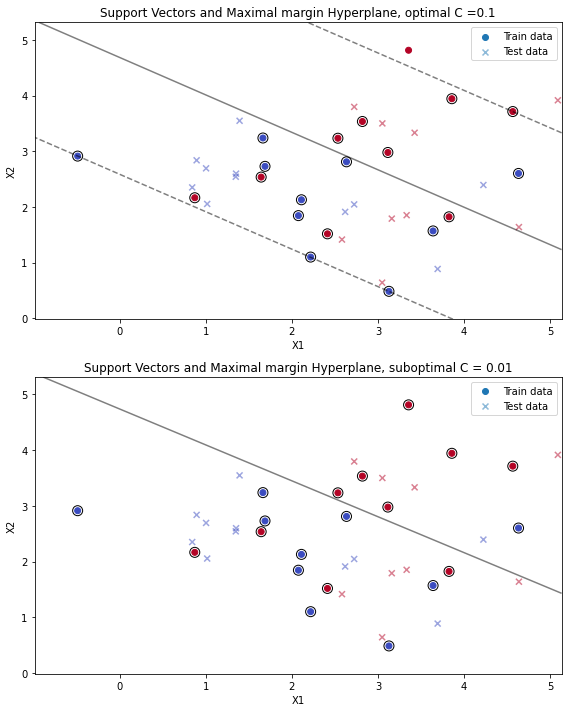

In [9]:
""" Plots """
fig = plt.figure(figsize=[8, 10])

# Create scatter plot data
ax = fig.add_subplot(2, 1, 1) 
svm_def.svm_plot(ax, x, y, Z_opt, clf_opt, xtest=xtest, 
                 ytest=ytest, plottest=True)

plt.legend(["Train data", "Test data"])
title = ("Support Vectors and Maximal margin Hyperplane, optimal C =" 
         + str(clf_tune.best_params_['C']))
plt.title(title)

# Plot alternative fit, scatter plot data
ax = fig.add_subplot(2, 1, 2) 
svm_def.svm_plot(ax, x, y, Z_001, clf_001, xtest=xtest, 
                 ytest=ytest, plottest=True)
plt.legend(["Train data", "Test data"])
plt.title("Support Vectors and Maximal margin Hyperplane, suboptimal C = 0.01")

plt.tight_layout()
plt.show()

Now consider a situation in which the two classes are linearly separable. Then we can find a separating hyperplane using the **svm.SVC()** function. We first further separate the two classes in our simulated data so that they are linearly separable, but only barely:

In [10]:
# Create data
n = 10
np.random.seed(4) 

# x from normal distribution # y is n elements -1 and n elements 1
x = np.random.normal(loc = 2, scale = 1.0, size = (2*n, 2))
y = np.concatenate((-1 * np.ones(n), np.ones(n))) 
# Further seperate data
x[y==1, :] += 1.5

We fit the support vector classifier and plot the resulting hyperplane, using a very large value
of **cost** so that no observations are misclassified 

In [11]:
# Case with high C
clf_1e5 = svm.SVC(kernel='linear', C=1e5)
clf_1e5.fit(x, y)
Z_1e5 = clf_1e5.decision_function(xy).reshape(xx.shape)

""" Predict scores """
# Generate new dataset
np.random.seed(3) 
# x from normal distribution # random y 
xtest = np.random.normal(loc = 2, scale = 1.0, size = (2*n, 2)) 
ytest = np.random.choice((-1, 1), 2*n)  

xtest[ytest==1, :] += 1.5
ypred_1e5 = clf_1e5.predict(xtest)
tab_1e5 = svm_def.table_scores(ypred_1e5, ytest)
print("\nC = 1e5 on seperable data gives scores:\n", tab_1e5)


C = 1e5 on seperable data gives scores:
          Pred -1  Pred 1
True -1      9.0     3.0
True 1       2.0     6.0


No training errors were made and only three support vectors were used, see the top panel. However, we can see from the figure that the margin is very narrow (because the support vectors, indicated as circles, are very close to the decision boundary). Indeed, $5$ points of the test data are misclassified. 
We now try a smaller value of cost:

In [12]:
# Case with lower C 
clf_1 = svm.SVC(kernel='linear', C=1)
clf_1.fit(x, y)
Z_1 = clf_1.decision_function(xy).reshape(xx.shape)

# Compare to another setting for C:
clf_1 = svm.SVC(kernel='linear', C=1)
clf_1.fit(x, y)

ypred_1 = clf_1.predict(xtest)
tab_1 = svm_def.table_scores(ypred_1, ytest)
print("\nC = 0.1 on seperable data gives scores:\n", tab_1, "\n\n")


C = 0.1 on seperable data gives scores:
          Pred -1  Pred 1
True -1     10.0     2.0
True 1       2.0     6.0 




Using **cost=1**, we misclassify one training observation, but we also obtain a much wider margin and make use of seven support vectors as shown in the bottom panel. It seems likely that this model will perform better on test data than the model with **cost=1e5**.

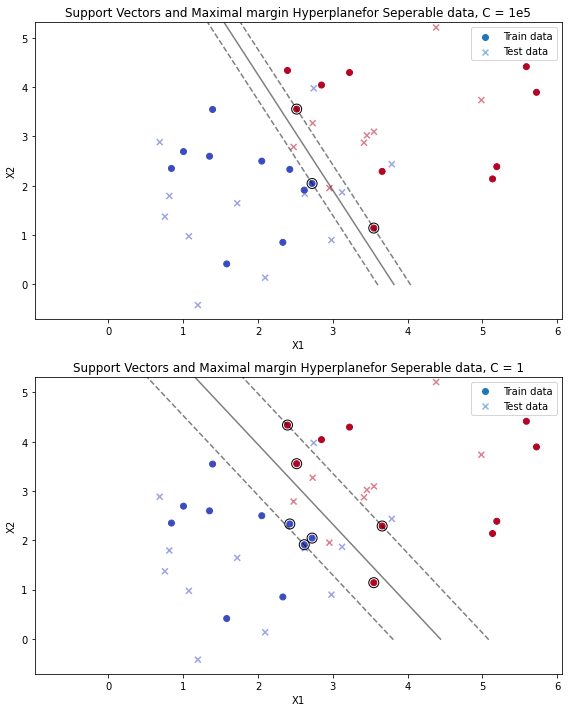

In [13]:
""" Plots """
fig = plt.figure(figsize=[8, 10])

# Plot alternative fit, scatter plot data
ax = fig.add_subplot(2, 1, 1) 
svm_def.svm_plot(ax, x, y, Z_1e5, clf_1e5, xtest=xtest, 
                 ytest=ytest, plottest=True)

plt.legend(["Train data", "Test data"])
plt.title("Support Vectors and Maximal margin Hyperplane\
for Seperable data, C = 1e5")

# Plot alternative fit, scatter plot data
ax = fig.add_subplot(2, 1, 2) 
svm_def.svm_plot(ax, x, y, Z_1, clf_1, xtest=xtest, 
                 ytest=ytest, plottest=True)
plt.legend(["Train data", "Test data"])
plt.title("Support Vectors and Maximal margin Hyperplane\
for Seperable data, C = 1")

plt.tight_layout()
plt.show()